In [17]:
import pandas as pd
import numpy as np
import os 
import statistics 
from pathlib import Path
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import math
from statsmodels.stats.anova import AnovaRM
from numpy import mean, std, cov
from numpy.random import seed, randn
import random as rd
#from sklearn import preprocessing
#from sklearn import datasets
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
from __future__ import division
import sys
import scipy
from math import sqrt
import scipy.stats as stats
from scipy import stats 
from scipy.stats import t, pearsonr, sem, spearmanr
import seaborn as sns
from statistics import mean, stdev
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
#import pingouin as pg
#from pingouin import ttest
from scipy.special import logsumexp
from pathlib import Path

In [21]:
#go to current directory and upload behavioral data
path = os.chdir('/mnt/disk01/farerilab/GitHub/WTP_Rejection_Choice')

current_dir = os.getcwd()
shortformdata = pd.read_csv('shortformdata.csv')
longformdata = pd.read_csv('longformdata.csv')


#create sepeate dataframes with values for within each condition
rej = shortformdata.loc[shortformdata['condition_recode']==1].reset_index(drop=True)
acc = shortformdata.loc[shortformdata['condition_recode']==2].reset_index(drop=True)

rej_long = longformdata.loc[longformdata['condition_recode']==1].reset_index(drop=True)
acc_long = longformdata.loc[longformdata['condition_recode']==2].reset_index(drop=True)



In [13]:
print(path)

/mnt/disk01/farerilab/GitHub/WTP_Rejection_Choice


In [27]:
#import the individual difference measure csvs
scoringpath = os.chdir('/mnt/disk01/farerilab/GitHub/WTP_Rejection_Choice/scoring')

aq = pd.read_csv('aq.csv')
ntbs = pd.read_csv('ntbs.csv')
rsq = pd.read_csv('rsq.csv')
scs = pd.read_csv('scs.csv')
mspss = pd.read_csv('mspss.csv')

In [ ]:
#create columns that represent the value differences between social and non social choices in each condition

rej['valuediff_mean']= rej ['social_decisionprice_mean'] - rej ['social_decisionprice_mean']
print(rej['valuediff_mean'])

acc['valuediff_mean']= acc ['social_decisionprice_mean'] - acc ['social_decisionprice_mean']
print(acc['valuediff_mean'])

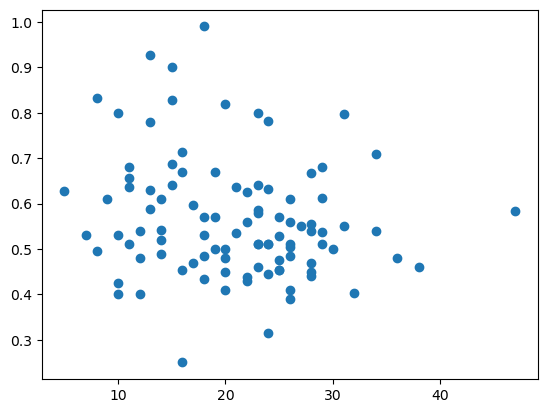

[[ 5.87944456e+01 -1.83704364e-01]
 [-1.83704364e-01  1.74078102e-02]]
Spearmans correlation: -0.181
p value: 0.0740
Accept null hypothesis that the means are equal.


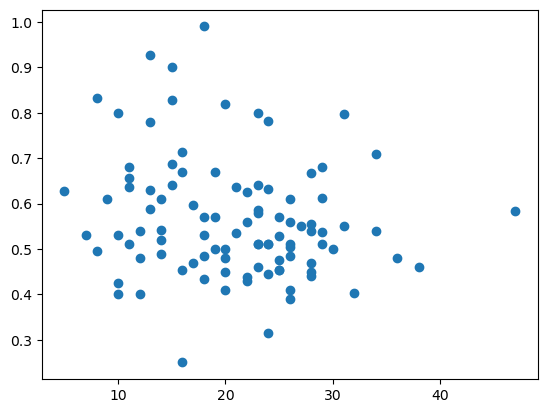

[[ 5.87944456e+01 -1.83704364e-01]
 [-1.83704364e-01  1.74078102e-02]]
Spearmans correlation: -0.181
p value: 0.0740
Accept null hypothesis that the means are equal.


In [35]:
# prop_socialchoice_ // AQ
pyplot.scatter(aq['AQ'],rej['overall_prop_social_choice'])
pyplot.show()
covariance = cov(aq['AQ'],rej['overall_prop_social_choice'])
print(covariance)
corr, _ = spearmanr(aq['AQ'],rej['overall_prop_social_choice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],rej['overall_prop_social_choice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(aq['AQ'],acc['overall_prop_social_choice'])
pyplot.show()
covariance = cov(aq['AQ'],acc['overall_prop_social_choice'])
print(covariance)
corr, _ = spearmanr(aq['AQ'],acc['overall_prop_social_choice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],acc['overall_prop_social_choice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    

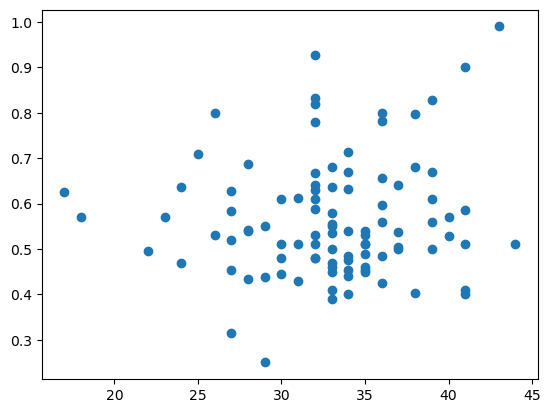

[[2.55351357e+01 6.99131209e-02]
 [6.99131209e-02 1.74078102e-02]]
Spearmans correlation: 0.027
p value: 0.7924
Accept null hypothesis that the means are equal.


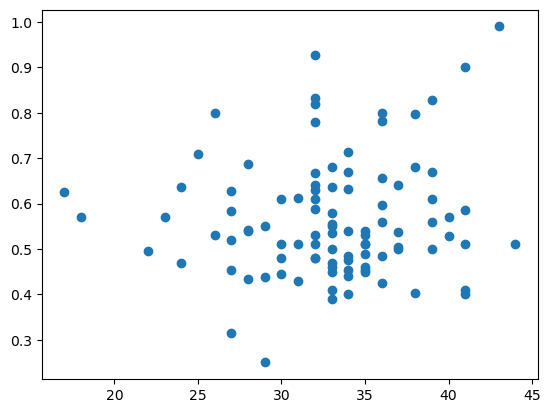

[[2.55351357e+01 6.99131209e-02]
 [6.99131209e-02 1.74078102e-02]]
Spearmans correlation: 0.027
p value: 0.7924
Accept null hypothesis that the means are equal.


In [39]:
# prop_socialchoice_ // NTBS
pyplot.scatter(ntbs['NTBS_score'],rej['overall_prop_social_choice'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],rej['overall_prop_social_choice'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],rej['overall_prop_social_choice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],rej['overall_prop_social_choice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(ntbs['NTBS_score'],acc['overall_prop_social_choice'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],acc['overall_prop_social_choice'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],acc['overall_prop_social_choice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],acc['overall_prop_social_choice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

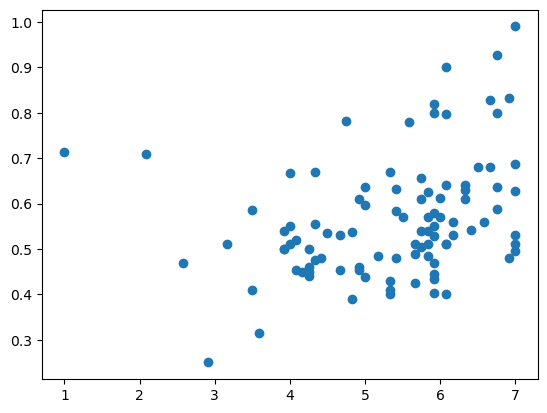

[[1.40585551 0.05068377]
 [0.05068377 0.01740781]]
Spearmans correlation: 0.381
p value: 0.0001
Reject the null hypothesis that the means are equal.


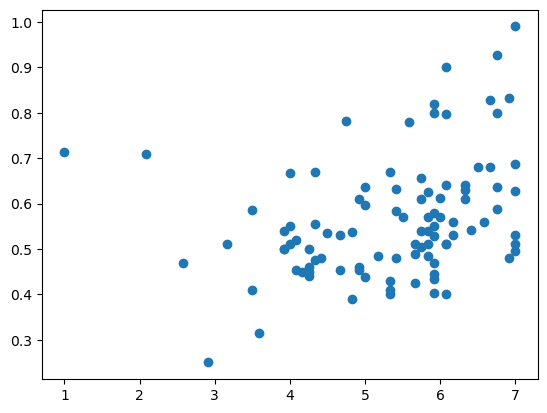

[[1.40585551 0.05068377]
 [0.05068377 0.01740781]]
Spearmans correlation: 0.381
p value: 0.0001
Reject the null hypothesis that the means are equal.


In [41]:
# prop_socialchoice_ // MSPSS
pyplot.scatter(mspss['MSPSS_score'],rej['overall_prop_social_choice'])
pyplot.show()
covariance = cov(mspss['MSPSS_score'],rej['overall_prop_social_choice'])
print(covariance)
corr, _ = spearmanr(mspss['MSPSS_score'],rej['overall_prop_social_choice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(mspss['MSPSS_score'],rej['overall_prop_social_choice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(mspss['MSPSS_score'],acc['overall_prop_social_choice'])
pyplot.show()
covariance = cov(mspss['MSPSS_score'],acc['overall_prop_social_choice'])
print(covariance)
corr, _ = spearmanr(mspss['MSPSS_score'],acc['overall_prop_social_choice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(mspss['MSPSS_score'],acc['overall_prop_social_choice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

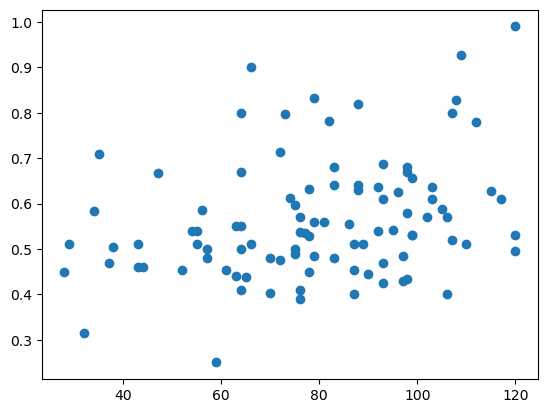

[[5.10737745e+02 9.00546257e-01]
 [9.00546257e-01 1.74078102e-02]]
Spearmans correlation: 0.302
p value: 0.0025
Reject the null hypothesis that the means are equal.


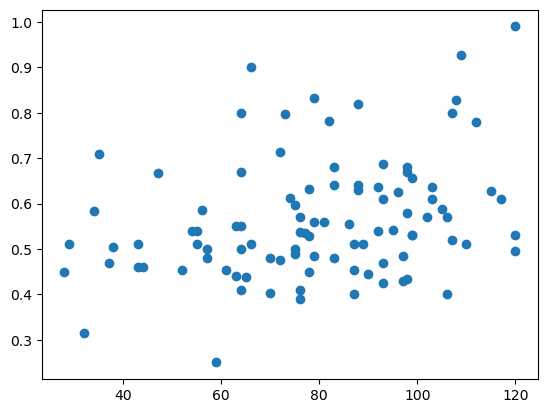

[[5.10737745e+02 9.00546257e-01]
 [9.00546257e-01 1.74078102e-02]]
Spearmans correlation: 0.302
p value: 0.0025
Reject the null hypothesis that the means are equal.


In [45]:
# prop_socialchoice_ // SCS

pyplot.scatter(scs['SCS_score'],rej['overall_prop_social_choice'])
pyplot.show()
covariance = cov(scs['SCS_score'],rej['overall_prop_social_choice'])
print(covariance)
corr, _ = spearmanr(scs['SCS_score'],rej['overall_prop_social_choice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs['SCS_score'],rej['overall_prop_social_choice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(scs['SCS_score'],acc['overall_prop_social_choice'])
pyplot.show()
covariance = cov(scs['SCS_score'],acc['overall_prop_social_choice'])
print(covariance)
corr, _ = spearmanr(scs['SCS_score'],acc['overall_prop_social_choice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs['SCS_score'],acc['overall_prop_social_choice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

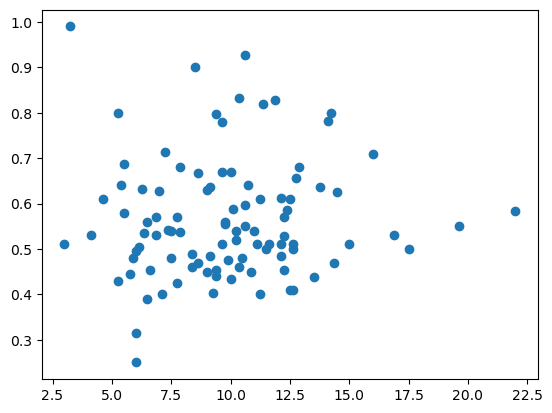

[[11.62944621  0.02156311]
 [ 0.02156311  0.01740781]]
Spearmans correlation: 0.085
p value: 0.4045
Accept null hypothesis that the means are equal.


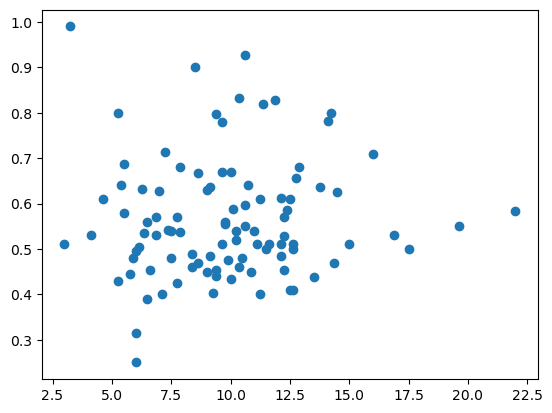

[[11.62944621  0.02156311]
 [ 0.02156311  0.01740781]]
Spearmans correlation: 0.085
p value: 0.4045
Accept null hypothesis that the means are equal.


In [53]:
# prop_socialchoice_ // RSQ

pyplot.scatter(rsq['RSQ_finalscore'],rej['overall_prop_social_choice'])
pyplot.show()
covariance = cov(rsq['RSQ_finalscore'],rej['overall_prop_social_choice'])
print(covariance)
corr, _ = spearmanr(rsq['RSQ_finalscore'],rej['overall_prop_social_choice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq['RSQ_finalscore'],rej['overall_prop_social_choice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(rsq['RSQ_finalscore'],acc['overall_prop_social_choice'])
pyplot.show()
covariance = cov(rsq['RSQ_finalscore'],acc['overall_prop_social_choice'])
print(covariance)
corr, _ = spearmanr(rsq['RSQ_finalscore'],acc['overall_prop_social_choice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq['RSQ_finalscore'],acc['overall_prop_social_choice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

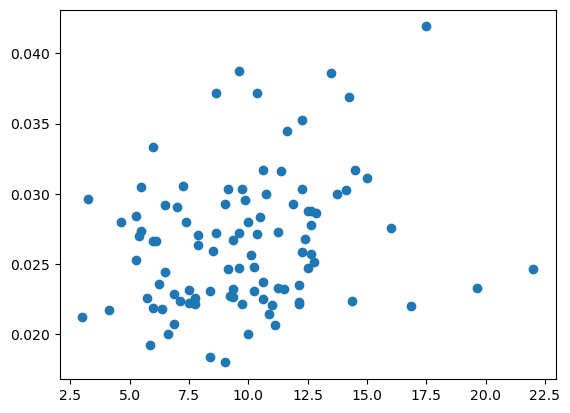

[[1.16294462e+01 3.72624024e-03]
 [3.72624024e-03 2.26778215e-05]]
Spearmans correlation: 0.237
p value: 0.0190
Reject the null hypothesis that the means are equal.


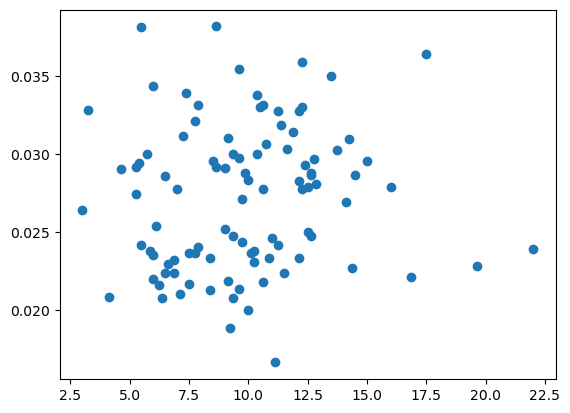

[[1.16294462e+01 1.29584614e-03]
 [1.29584614e-03 2.18218800e-05]]
Spearmans correlation: 0.146
p value: 0.1515
Accept null hypothesis that the means are equal.


In [55]:
# social_decisionprice_mean // RSQ

pyplot.scatter(rsq['RSQ_finalscore'],rej['social_decisionprice_mean'])
pyplot.show()
covariance = cov(rsq['RSQ_finalscore'],rej['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(rsq['RSQ_finalscore'],rej['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq['RSQ_finalscore'],rej['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(rsq['RSQ_finalscore'],acc['social_decisionprice_mean'])
pyplot.show()
covariance = cov(rsq['RSQ_finalscore'],acc['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(rsq['RSQ_finalscore'],acc['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq['RSQ_finalscore'],acc['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

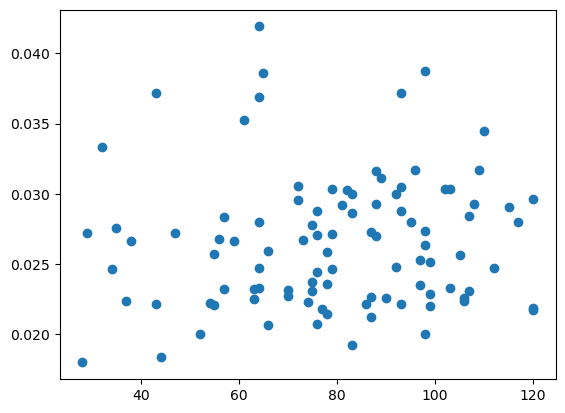

[[5.10737745e+02 6.84273569e-03]
 [6.84273569e-03 2.26778215e-05]]
Spearmans correlation: 0.113
p value: 0.2675
Accept null hypothesis that the means are equal.


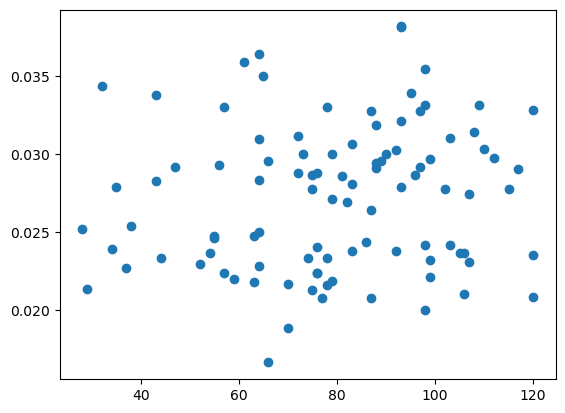

[[5.10737745e+02 1.29206057e-02]
 [1.29206057e-02 2.18218800e-05]]
Spearmans correlation: 0.132
p value: 0.1960
Accept null hypothesis that the means are equal.


In [57]:
# social_decisionprice_mean // SCS

pyplot.scatter(scs['SCS_score'],rej['social_decisionprice_mean'])
pyplot.show()
covariance = cov(scs['SCS_score'],rej['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(scs['SCS_score'],rej['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs['SCS_score'],rej['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(scs['SCS_score'],acc['social_decisionprice_mean'])
pyplot.show()
covariance = cov(scs['SCS_score'],acc['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(scs['SCS_score'],acc['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs['SCS_score'],acc['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

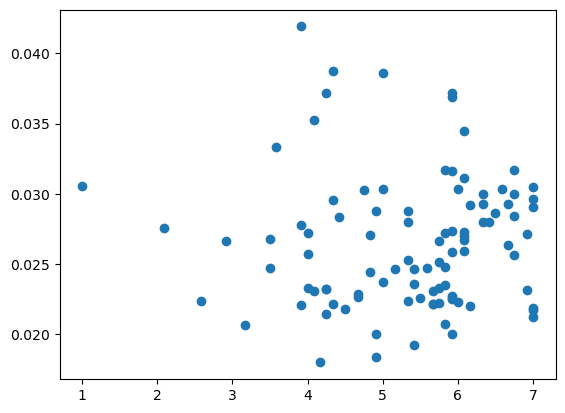

[[1.40585551e+00 3.07967633e-05]
 [3.07967633e-05 2.26778215e-05]]
Spearmans correlation: 0.124
p value: 0.2231
Accept null hypothesis that the means are equal.


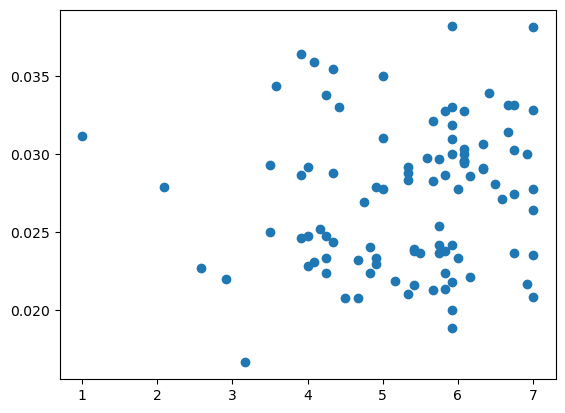

[[1.40585551e+00 6.57738814e-04]
 [6.57738814e-04 2.18218800e-05]]
Spearmans correlation: 0.157
p value: 0.1218
Accept null hypothesis that the means are equal.


In [59]:
# social_decisionprice_mean // MSPSS
pyplot.scatter(mspss['MSPSS_score'],rej['social_decisionprice_mean'])
pyplot.show()
covariance = cov(mspss['MSPSS_score'],rej['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(mspss['MSPSS_score'],rej['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(mspss['MSPSS_score'],rej['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(mspss['MSPSS_score'],acc['social_decisionprice_mean'])
pyplot.show()
covariance = cov(mspss['MSPSS_score'],acc['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(mspss['MSPSS_score'],acc['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(mspss['MSPSS_score'],acc['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

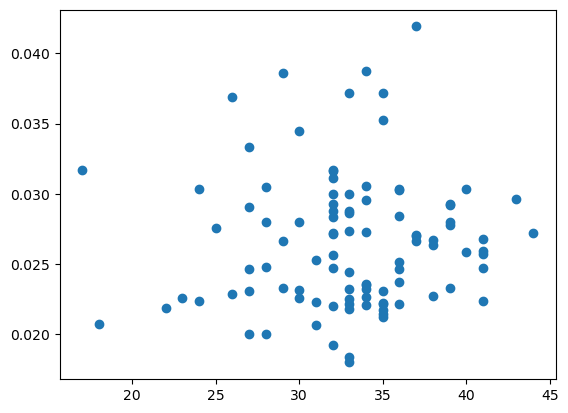

[[2.55351357e+01 1.08176872e-03]
 [1.08176872e-03 2.26778215e-05]]
Spearmans correlation: 0.056
p value: 0.5835
Accept null hypothesis that the means are equal.


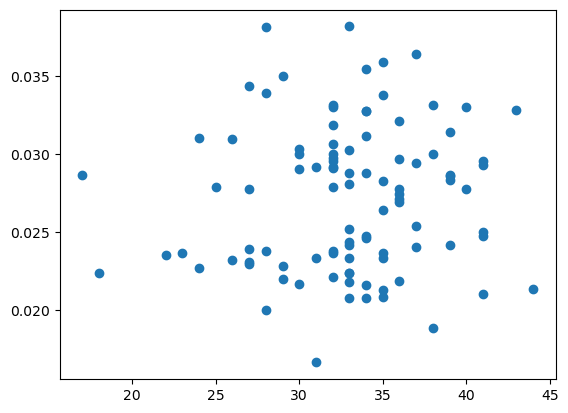

[[2.55351357e+01 1.78013872e-03]
 [1.78013872e-03 2.18218800e-05]]
Spearmans correlation: 0.074
p value: 0.4675
Accept null hypothesis that the means are equal.


In [61]:
# social_decisionprice_mean // NTBS
pyplot.scatter(ntbs['NTBS_score'],rej['social_decisionprice_mean'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],rej['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],rej['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],rej['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(ntbs['NTBS_score'],acc['social_decisionprice_mean'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],acc['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],acc['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],acc['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

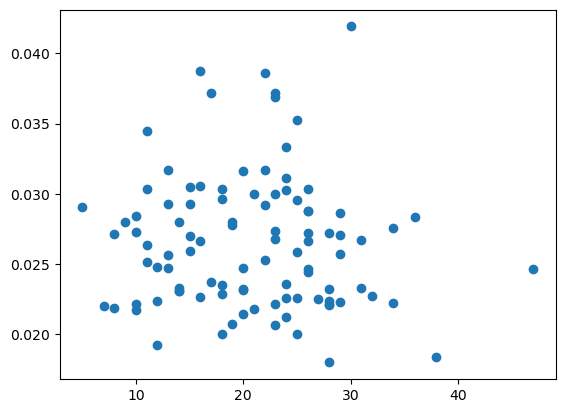

[[ 5.87944456e+01 -2.03390414e-03]
 [-2.03390414e-03  2.26778215e-05]]
Spearmans correlation: -0.071
p value: 0.4865
Accept null hypothesis that the means are equal.


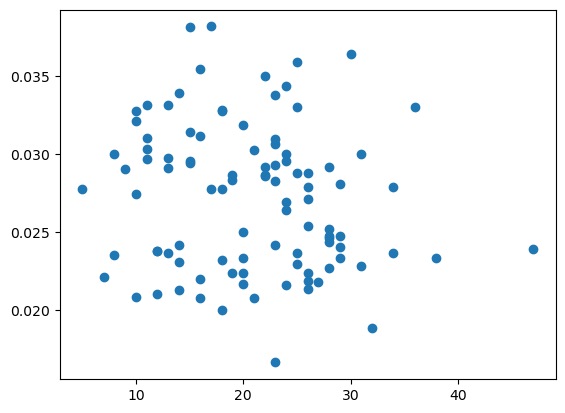

[[ 5.87944456e+01 -5.32210177e-03]
 [-5.32210177e-03  2.18218800e-05]]
Spearmans correlation: -0.149
p value: 0.1427
Accept null hypothesis that the means are equal.


In [63]:
# social_decisionprice_mean // AQ
pyplot.scatter(aq['AQ'],rej['social_decisionprice_mean'])
pyplot.show()
covariance = cov(aq['AQ'],rej['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(aq['AQ'],rej['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],rej['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(aq['AQ'],acc['social_decisionprice_mean'])
pyplot.show()
covariance = cov(aq['AQ'],acc['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(aq['AQ'],acc['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],acc['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

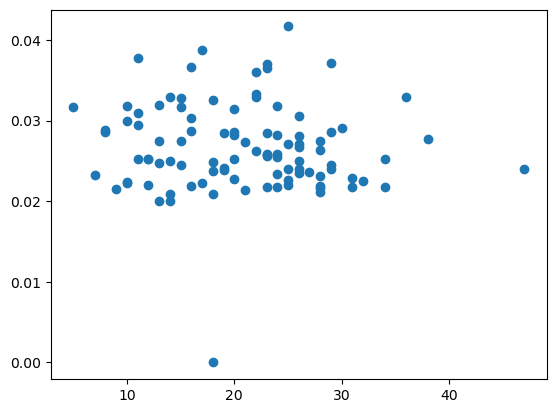

[[ 5.87944456e+01 -2.89220670e-03]
 [-2.89220670e-03  3.00794206e-05]]
Spearmans correlation: -0.110
p value: 0.2797
Accept null hypothesis that the means are equal.


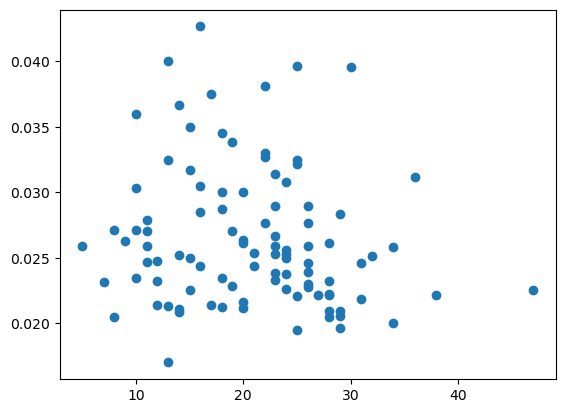

[[ 5.87944456e+01 -5.96646544e-03]
 [-5.96646544e-03  2.81659677e-05]]
Spearmans correlation: -0.192
p value: 0.0580
Accept null hypothesis that the means are equal.


In [65]:
# nonsocial_decisionprice_mean // AQ
pyplot.scatter(aq['AQ'],rej['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(aq['AQ'],rej['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(aq['AQ'],rej['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],rej['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(aq['AQ'],acc['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(aq['AQ'],acc['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(aq['AQ'],acc['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],acc['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

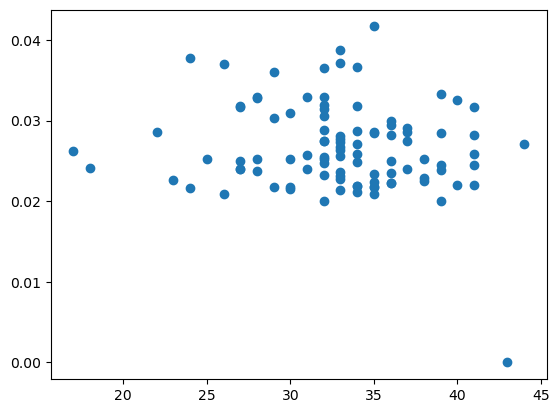

[[ 2.55351357e+01 -4.61894873e-03]
 [-4.61894873e-03  3.00794206e-05]]
Spearmans correlation: -0.117
p value: 0.2527
Accept null hypothesis that the means are equal.


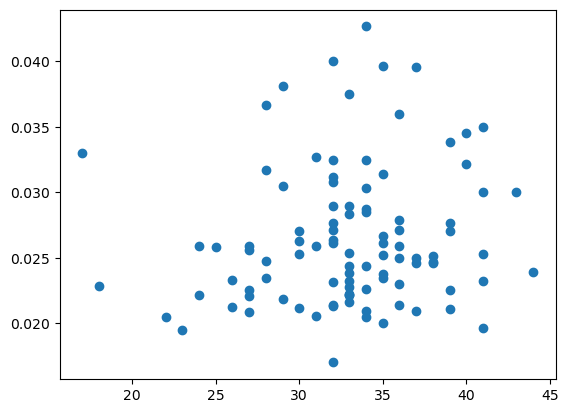

[[2.55351357e+01 3.32509595e-03]
 [3.32509595e-03 2.81659677e-05]]
Spearmans correlation: 0.137
p value: 0.1796
Accept null hypothesis that the means are equal.


In [67]:
# nonsocial_decisionprice_mean // NTBS
pyplot.scatter(ntbs['NTBS_score'],rej['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],rej['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],rej['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],rej['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(ntbs['NTBS_score'],acc['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],acc['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],acc['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],acc['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

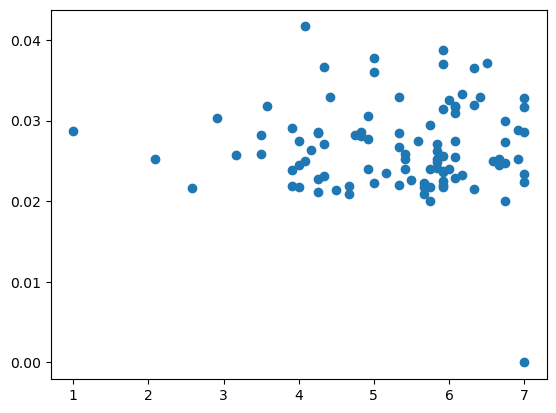

[[ 1.40585551e+00 -2.85630029e-04]
 [-2.85630029e-04  3.00794206e-05]]
Spearmans correlation: 0.043
p value: 0.6776
Accept null hypothesis that the means are equal.


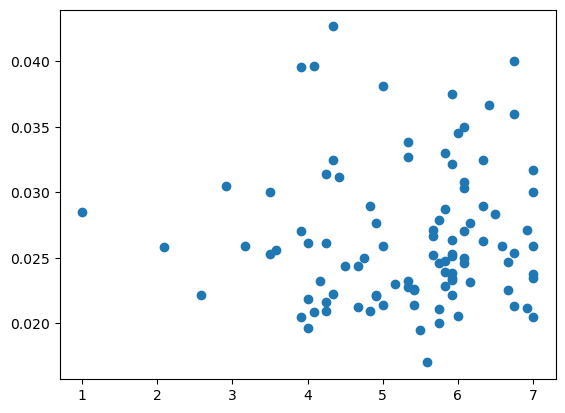

[[1.40585551e+00 1.37606515e-04]
 [1.37606515e-04 2.81659677e-05]]
Spearmans correlation: 0.101
p value: 0.3245
Accept null hypothesis that the means are equal.


In [69]:
# nonsocial_decisionprice_mean // MSPSS
pyplot.scatter(mspss['MSPSS_score'],rej['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(mspss['MSPSS_score'],rej['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(mspss['MSPSS_score'],rej['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(mspss['MSPSS_score'],rej['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(mspss['MSPSS_score'],acc['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(mspss['MSPSS_score'],acc['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(mspss['MSPSS_score'],acc['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(mspss['MSPSS_score'],acc['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

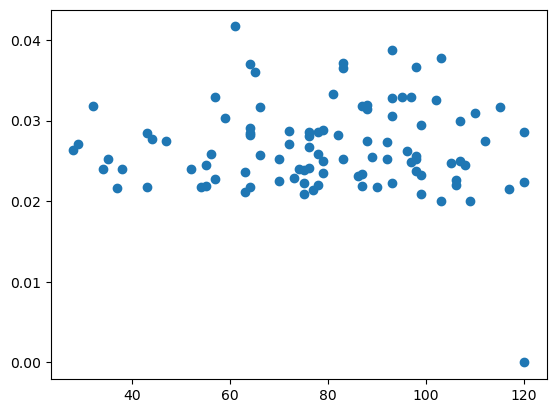

[[ 5.10737745e+02 -6.77881267e-03]
 [-6.77881267e-03  3.00794206e-05]]
Spearmans correlation: 0.008
p value: 0.9342
Accept null hypothesis that the means are equal.


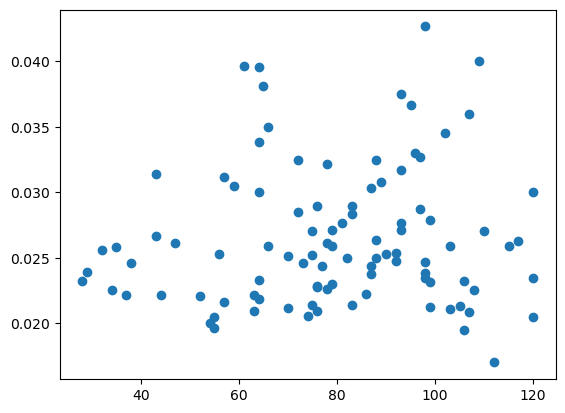

[[5.10737745e+02 1.03933006e-02]
 [1.03933006e-02 2.81659677e-05]]
Spearmans correlation: 0.088
p value: 0.3912
Accept null hypothesis that the means are equal.


In [71]:
# nonsocial_decisionprice_mean // SCS

pyplot.scatter(scs['SCS_score'],rej['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(scs['SCS_score'],rej['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(scs['SCS_score'],rej['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs['SCS_score'],rej['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(scs['SCS_score'],acc['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(scs['SCS_score'],acc['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(scs['SCS_score'],acc['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs['SCS_score'],acc['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

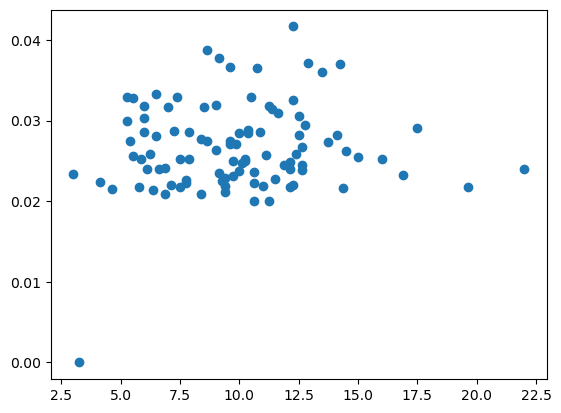

[[1.16294462e+01 2.18994260e-03]
 [2.18994260e-03 3.00794206e-05]]
Spearmans correlation: 0.070
p value: 0.4949
Accept null hypothesis that the means are equal.


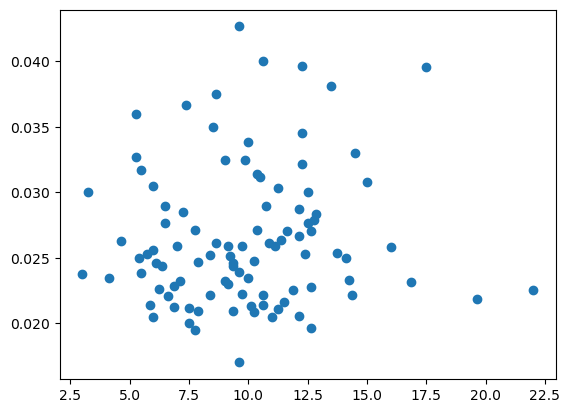

[[1.16294462e+01 1.18168702e-03]
 [1.18168702e-03 2.81659677e-05]]
Spearmans correlation: 0.075
p value: 0.4630
Accept null hypothesis that the means are equal.


In [73]:
# nonsocial_decisionprice_mean // RSQ

pyplot.scatter(rsq['RSQ_finalscore'],rej['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(rsq['RSQ_finalscore'],rej['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(rsq['RSQ_finalscore'],rej['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq['RSQ_finalscore'],rej['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(rsq['RSQ_finalscore'],acc['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(rsq['RSQ_finalscore'],acc['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(rsq['RSQ_finalscore'],acc['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq['RSQ_finalscore'],acc['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [ ]:
#code for plots that you will need to use and edit for each thing we want plotted

sns.set(font_scale=2)
sns.set_style('white')
plt.figure(figsize=(10,6))
r = scipy.stats.spearmanr(a=ntbs_overallaffect_scatter.ntbs_, b=ntbs_overallaffect_scatter.overallaffect_)[0]
ntbs_overallaffect_scatter = sns.regplot(x= "ntbs_", y= "overallaffect_", data= ntbs_overallaffect_scatter, scatter_kws={"color": "cornflowerblue"}, line_kws={"color": "cornflowerblue"})
ntbs_overallaffect_scatter.set_ylabel('Overall Self-Reported Affect')
ntbs_overallaffect_scatter.set_xlabel('NTBS Score')